In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Outcome 제거, BMI 예측 회기로
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [3]:
# 결측치 확인
print(df.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 인코딩
encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])
print(df)

        id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0    2   0.455     0.365   0.095        0.5140          0.2245   
1        1    2   0.350     0.265   0.090        0.2255          0.0995   
2        2    0   0.530     0.420   0.135        0.6770          0.2565   
3        3    2   0.440     0.365   0.125        0.5160          0.2155   
4        4    1   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ...     ...       ...     ...           ...             ...   
4172  4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173  4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174  4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175  4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176  4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1          

In [7]:
from tensorflow.keras.utils import to_categorical

# x, y값 분류 및 numpy 변환
X = df.drop(['Rings'], axis=1).values
# y는 one-hot-encoding 적용
y = df['Rings'].values

X.shape, y.shape

((4177, 9), (4177,))

In [9]:
# train, test값 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 9), (836, 9), (3341,), (836,))

In [10]:
# 정규화

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 딥러닝(회귀) 시작
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD,Adam

# 머신 정의
model = Sequential()

# ReLU (Rectified Linear Unit) 활성화 함수 사용
model.add(Dense(8, input_shape=(9,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
# 1차원 배열을 예측값으로 출력층 지정
model.add(Dense(1))

# optimizer는 rmsprop, loss function은 mse
# 회귀는 활성화함수를 추가하지 않음
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,091 (8.17 KB)

 Trainable params: 2,091 (8.17 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
EPOCHS = 10

history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 52.0346 - mse: 52.0346 - val_loss: 41.5138 - val_mse: 41.5138
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34.2425 - mse: 34.2425 - val_loss: 33.2280 - val_mse: 33.2280
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32.2638 - mse: 32.2638 - val_loss: 28.8568 - val_mse: 28.8568
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29.2689 - mse: 29.2689 - val_loss: 27.8269 - val_mse: 27.8269
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.2778 - mse: 23.2778 - val_loss: 21.4177 - val_mse: 21.4177
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.9969 - mse: 19.9969 - val_loss: 16.3757 - val_mse: 16.3757
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.1550 - mse: 16.1550 - val_loss: 13.1393 - val_mse: 13.1393
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12.0280 - mse: 12.0280 - val_loss: 11.4202 - val_mse: 11.4202
Epoch 9/10
105/105 ━━━━

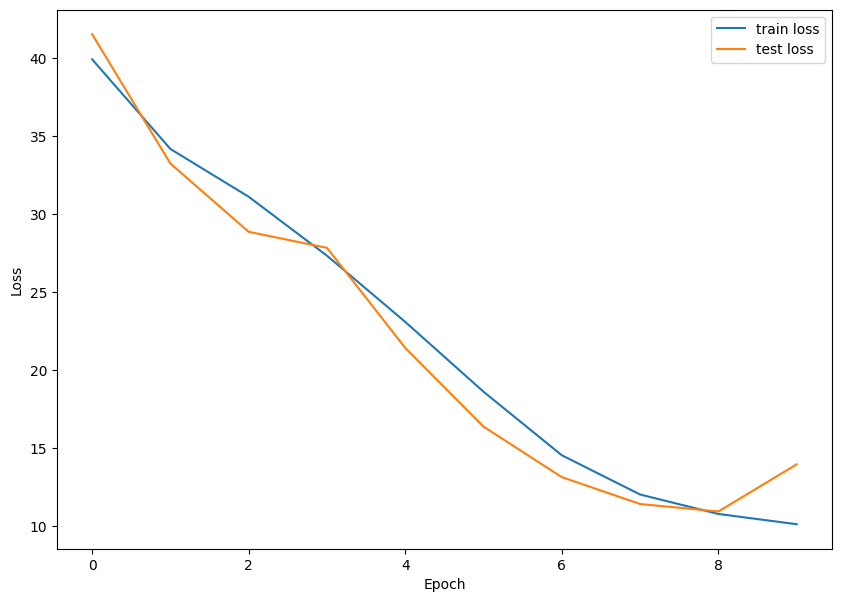

In [19]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()